                    LEVEL 3 - DATASCIENCE INTERNSHIP

                       #TASK 1:PREDICTIVE MODELLING

#Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings

In [9]:
warnings.filterwarnings("ignore")
df = pd.read_csv('Dataset.csv')

non_numericcols =df.select_dtypes(exclude=[float, int]).columns.tolist()
print("Columns with non-numeric values:")
print(non_numericcols)

df.drop(columns=non_numericcols,inplace = True)

x = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

Columns with non-numeric values:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


#Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics

In [17]:
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
#Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

#Function to train and evaluate regression model

def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

#Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [36]:
#Training and evaluating Linear Regression model:

linear_regression = LinearRegression()
mse_lr,r2_lr = train_and_evaluate_model(linear_regression)

#Training and evaluating Decision Tree Regression model:

decision_tree = DecisionTreeRegressor()
mse_dst,r2_dst = train_and_evaluate_model(decision_tree)

#Training and evaluating Random Forest Regression model:

random_forest = RandomForestRegressor()
mse_rf,r2_rf = train_and_evaluate_model(random_forest)

print(f"Linear Regression - MSE: {mse_lr:.2f},R2 Score: {r2_lr:.2f}" )
print(f"Decision Tree Regression - MSE: {mse_dst:.2f},R2 Score: {r2_dst:.2f}")
print(f"Random Forest Regression - MSE: {mse_rf:.2f},R2 Score: {r2_rf:.2f}")

Linear Regression - MSE: 1.46,R2 Score: 0.35
Decision Tree Regression - MSE: 0.16,R2 Score: 0.93
Random Forest Regression - MSE: 0.08,R2 Score: 0.96


                           #TASK 3: DATA VISUALIZATION

#Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset.csv')

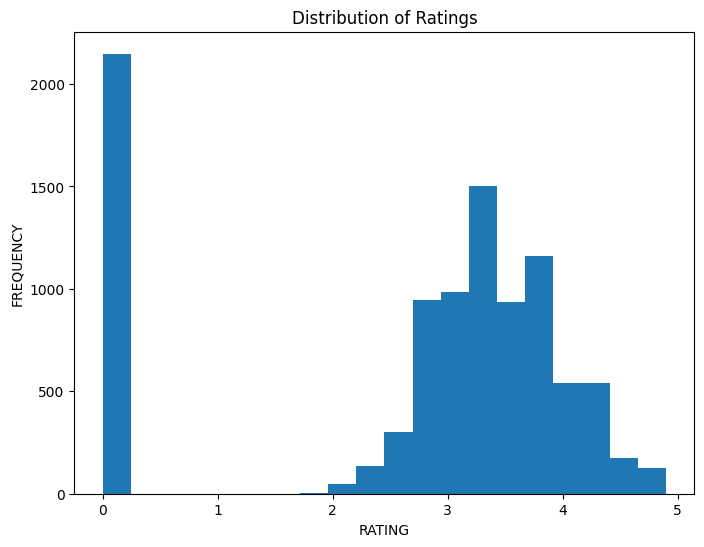

In [6]:
#Using Histogram

plt.figure(figsize=(8,6))
plt.hist(df['Aggregate rating'], bins=20)
plt.xlabel('RATING')
plt.ylabel('FREQUENCY')
plt.title('Distribution of Ratings')
plt.show()

#Compare the average ratings of different cuisines or cities using appropriate visualizations.

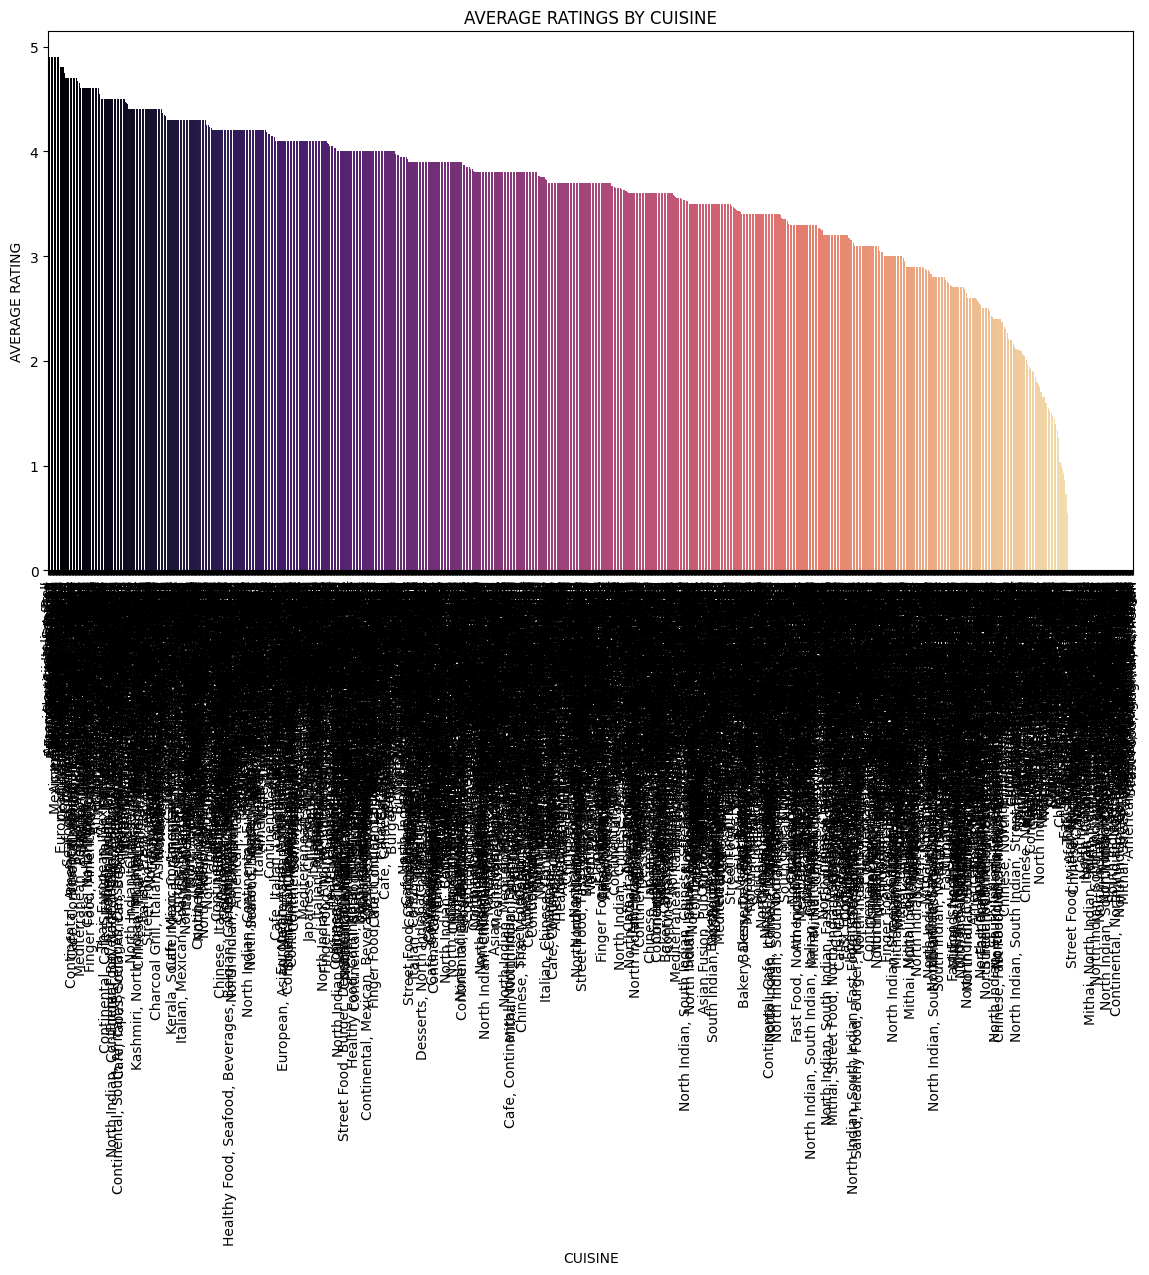

In [13]:
#Compare the average ratings of different cuisines
plt.figure(figsize=(14,7))
ave_ratings_cuisine=df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=ave_ratings_cuisine.index,y=ave_ratings_cuisine.values,palette='magma')
plt.xlabel('CUISINE')
plt.ylabel('AVERAGE RATING')
plt.title("AVERAGE RATINGS BY CUISINE")
plt.xticks(rotation=90)
plt.show()

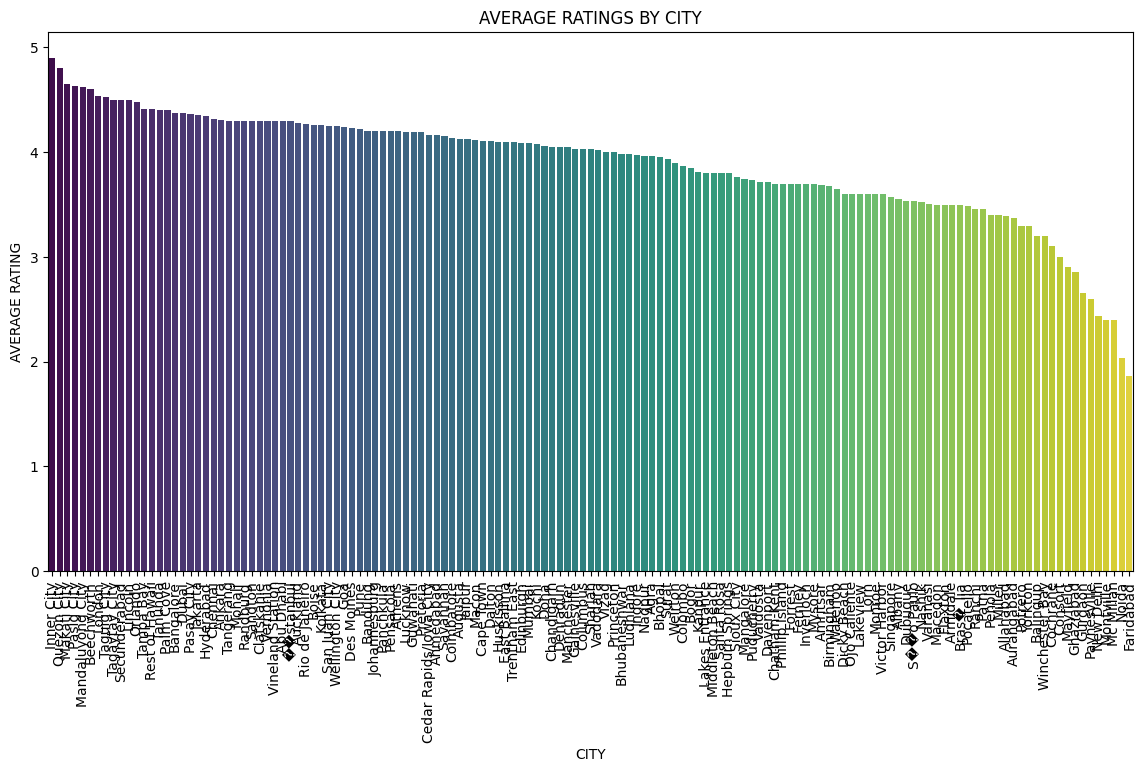

In [14]:
#Compare the average ratings of different cities
plt.figure(figsize=(14,7))
ave_ratings_cities=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
sns.barplot(x=ave_ratings_cities.index,y=ave_ratings_cities.values,palette='viridis')
plt.xlabel('CITY')
plt.ylabel('AVERAGE RATING')
plt.title("AVERAGE RATINGS BY CITY")
plt.xticks(rotation=90)
plt.show()

#Visualize the relationship between various features and the target variable to gain insights.

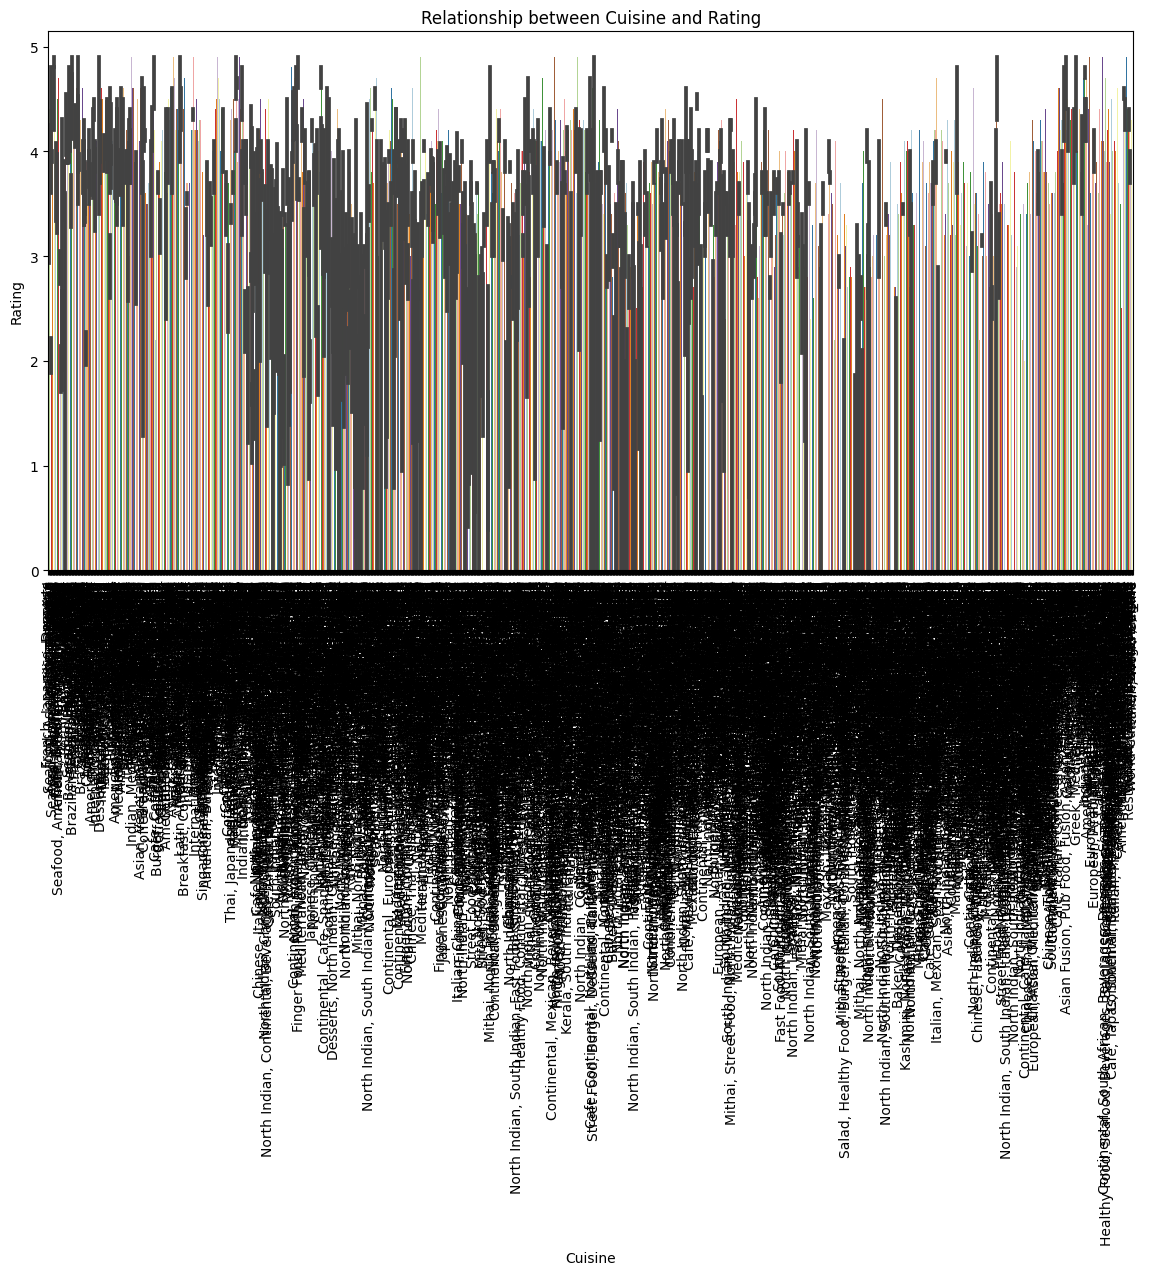

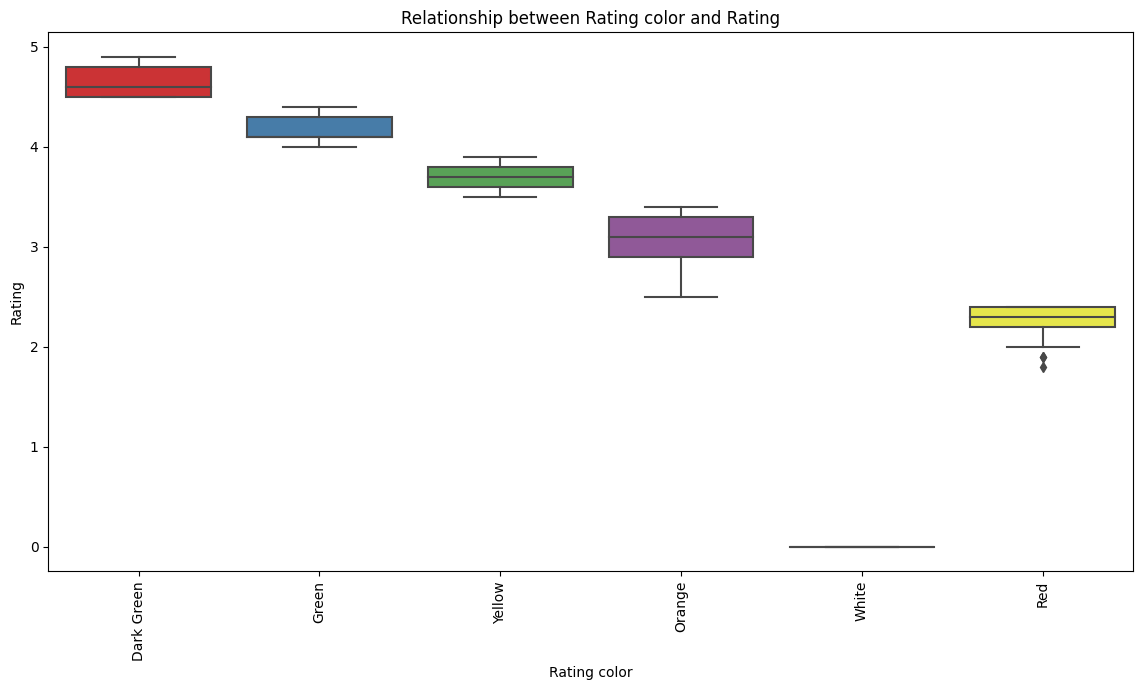

In [19]:
#VISUALIZATION
plt.figure(figsize=(14,7))
sns.barplot(x='Cuisines',y='Aggregate rating',data=df, palette='Paired')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('Relationship between Cuisine and Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(x='Rating color',y='Aggregate rating',data=df, palette='Set1')
plt.xlabel('Rating color')
plt.ylabel('Rating')
plt.title('Relationship between Rating color and Rating')
plt.xticks(rotation=90)
plt.show()
